In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [3]:
print(dataset.shape)

(150, 5)


In [4]:
print(dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [6]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [7]:
# test different number of cores: max 8
num_cpu_list = list(range(1,9))
training_times_all = []

In [9]:
param_grid = {"n_neighbors" : list(range(1,10))}
training_times = []

for num_cpu in num_cpu_list:
    clf = GridSearchCV(KNeighborsClassifier(), param_grid, scoring=scoring)
    clf.set_params(n_jobs=num_cpu)
    start_time = time.time()
    clf.fit(X_train, y_train)
    training_times.append(time.time() - start_time)
    # print logging message
    print("Computing KNN grid with {} cores DONE.".format(num_cpu))

print("All computations DONE.")

Computing KNN grid with 1 cores DONE.
Computing KNN grid with 2 cores DONE.
Computing KNN grid with 3 cores DONE.
Computing KNN grid with 4 cores DONE.
Computing KNN grid with 5 cores DONE.
Computing KNN grid with 6 cores DONE.
Computing KNN grid with 7 cores DONE.
Computing KNN grid with 8 cores DONE.
All computations DONE.


In [10]:
# best parameters found
print("Best parameters:")
print(clf.best_params_)
print("With accuracy:")
print(clf.best_score_)


Best parameters:
{'n_neighbors': 7}
With accuracy:
0.991666666667


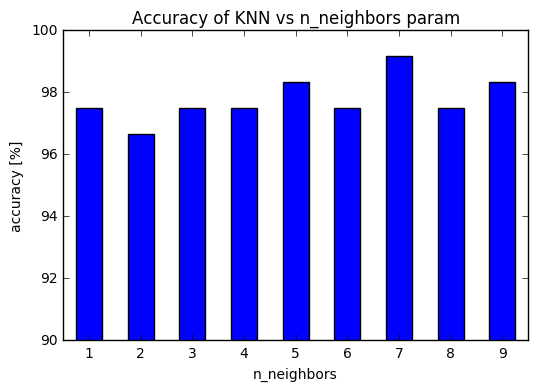

In [11]:
scores_all_percent = [100 * grid_score[1] for grid_score in clf.grid_scores_]
params_all = [grid_score[0]["n_neighbors"] for grid_score in clf.grid_scores_]

N = 9
ind = np.arange(N) # the x locations for bars
width = 0.5  # the width of the bars

fig, ax = plt.subplots()
ax.bar(ind + width/2, scores_all_percent, width)
ax.set_xticks(ind + width)
ax.set_xticklabels([str(i) for i in params_all])
ax.set_ylim([90,100])
plt.title("Accuracy of KNN vs n_neighbors param")
plt.xlabel("n_neighbors")
plt.ylabel("accuracy [%]")
plt.show()

The above plot shows that the best accuracy for KNN algorithm is obtained for **n_neighbors = 7**

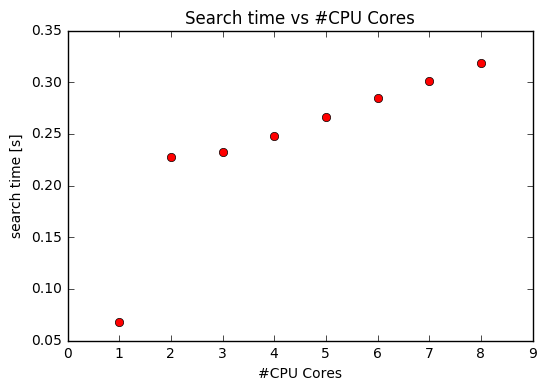

In [12]:
fig, ax = plt.subplots()
ax.plot(num_cpu_list, training_times, 'ro')
ax.set_xlim([0, len(num_cpu_list)+1])

#plt.axis([0, len(num_cpu_list)+1, 0, max(training_times)+1])
plt.title("Search time vs #CPU Cores")
plt.xlabel("#CPU Cores")
plt.ylabel("search time [s]")
plt.show()


We can see that the search time for **n_jobs > 1** is highier than for **n_jobs = 1**. The reason is that multiprocessing comes at cost i.e. the distribution of multiple processes can take more time that the actual execution time for the small datasets like **Iris** (150 rows).